In [5]:
import os

import pandas as pd
import numpy as np
from scipy.optimize import minimize, Bounds

In [6]:
DATA_DIR = "data"
# load asset data csv
asset_df = pd.read_csv(f"{DATA_DIR}/CSWIX_Equity.csv")
# change unnamed: 0 to date
asset_df["Date"] = pd.to_datetime(asset_df["Unnamed: 0"])
# drop unecessary columns
asset_df = asset_df.drop(labels = ["Unnamed: 0","Unnamed: 9","Unnamed: 10",
                                  "Unnamed: 11","Unnamed: 12","Unnamed: 13",
                                  "Unnamed: 14","Unnamed: 15","Unnamed: 16",
                                   "Unnamed: 17"],
                        axis=1)
# show data frame information
asset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SA Equity          197 non-null    float64       
 1   SA Nominal Bonds   197 non-null    float64       
 2   SA ILB             197 non-null    float64       
 3   SA Property        197 non-null    float64       
 4   SA Cash            197 non-null    float64       
 5   Offshore Equity    197 non-null    float64       
 6   Offshore Property  196 non-null    float64       
 7   Offshore Bonds     197 non-null    float64       
 8   Date               197 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(8)
memory usage: 14.0 KB


In [7]:
asset_df.head()

,SA Equity,SA Nominal Bonds,SA ILB,SA Property,SA Cash,Offshore Equity,Offshore Property,Offshore Bonds,Date
0,0.021720,0.006890,0.001790,0.084787,0.006946,0.051911,NaN,0.014841,2007-01-31
1,0.013512,0.013678,-0.003277,0.033749,0.006395,-0.006123,0.003727,0.025924,2007-02-28
2,0.033642,-0.004350,0.011483,0.032042,0.007160,0.023853,0.008252,-0.000661,2007-03-31
3,0.034085,0.015311,0.010923,0.077894,0.007063,0.009111,-0.029540,-0.019052,2007-04-30
4,-0.005539,-0.011036,0.002054,-0.036594,0.007336,0.042699,0.018951,-0.009298,2007-05-31


In [8]:
asset_df = asset_df.set_index(["Date"])
asset_df.head()

,SA Equity,SA Nominal Bonds,SA ILB,SA Property,SA Cash,Offshore Equity,Offshore Property,Offshore Bonds
Date,,,,,,,,
2007-01-31,0.021720,0.006890,0.001790,0.084787,0.006946,0.051911,NaN,0.014841
2007-02-28,0.013512,0.013678,-0.003277,0.033749,0.006395,-0.006123,0.003727,0.025924
2007-03-31,0.033642,-0.004350,0.011483,0.032042,0.007160,0.023853,0.008252,-0.000661
2007-04-30,0.034085,0.015311,0.010923,0.077894,0.007063,0.009111,-0.029540,-0.019052
2007-05-31,-0.005539,-0.011036,0.002054,-0.036594,0.007336,0.042699,0.018951,-0.009298


In [9]:
# get dataset colums
cols = asset_df.columns.tolist()
cols

['SA Equity',
 'SA Nominal Bonds',
 'SA ILB',
 'SA Property',
 'SA Cash',
 'Offshore Equity',
 'Offshore Property',
 'Offshore Bonds']

In [10]:
# calculate the memory used by the dataframe (megs)
asset_df.memory_usage(deep=True).sum()

14184

In [11]:
# get dytpe of each column
asset_df[cols].dtypes

SA Equity            float64
SA Nominal Bonds     float64
SA ILB               float64
SA Property          float64
SA Cash              float64
Offshore Equity      float64
Offshore Property    float64
Offshore Bonds       float64
dtype: object

In [12]:
# get memory used by each col
asset_df[cols].memory_usage(deep=True)

Index                1576
SA Equity            1576
SA Nominal Bonds     1576
SA ILB               1576
SA Property          1576
SA Cash              1576
Offshore Equity      1576
Offshore Property    1576
Offshore Bonds       1576
dtype: int64

In [13]:
asset_df[cols].memory_usage(deep=True).sum()

14184

## Data type exploration

In [14]:
asset_df[cols].select_dtypes(float).describe()

,SA Equity,SA Nominal Bonds,SA ILB,SA Property,SA Cash,Offshore Equity,Offshore Property,Offshore Bonds
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,196.000000,197.000000
mean,0.008108,0.006457,0.006206,0.007397,0.005547,0.011453,0.004659,0.007597
std,0.031942,0.022138,0.023775,0.057079,0.001533,0.042608,0.049242,0.043492
min,-0.139101,-0.097472,-0.174724,-0.363168,0.002795,-0.111391,-0.178234,-0.108381
25%,-0.010672,-0.005291,-0.003277,-0.025983,0.004545,-0.015147,-0.027503,-0.018894
50%,0.010870,0.006586,0.006227,0.010886,0.005436,0.009723,0.008946,0.002200
75%,0.026402,0.017885,0.015242,0.035342,0.006083,0.033718,0.034464,0.032002
max,0.103808,0.085070,0.164637,0.181911,0.009846,0.151592,0.117325,0.165276


In [15]:
# chaining
(asset_df
 [cols]
 .select_dtypes(float)
 .describe()
)

,SA Equity,SA Nominal Bonds,SA ILB,SA Property,SA Cash,Offshore Equity,Offshore Property,Offshore Bonds
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,196.000000,197.000000
mean,0.008108,0.006457,0.006206,0.007397,0.005547,0.011453,0.004659,0.007597
std,0.031942,0.022138,0.023775,0.057079,0.001533,0.042608,0.049242,0.043492
min,-0.139101,-0.097472,-0.174724,-0.363168,0.002795,-0.111391,-0.178234,-0.108381
25%,-0.010672,-0.005291,-0.003277,-0.025983,0.004545,-0.015147,-0.027503,-0.018894
50%,0.010870,0.006586,0.006227,0.010886,0.005436,0.009723,0.008946,0.002200
75%,0.026402,0.017885,0.015242,0.035342,0.006083,0.033718,0.034464,0.032002
max,0.103808,0.085070,0.164637,0.181911,0.009846,0.151592,0.117325,0.165276


In [16]:
asset_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197 entries, 2007-01-31 to 2023-05-31
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SA Equity          197 non-null    float64
 1   SA Nominal Bonds   197 non-null    float64
 2   SA ILB             197 non-null    float64
 3   SA Property        197 non-null    float64
 4   SA Cash            197 non-null    float64
 5   Offshore Equity    197 non-null    float64
 6   Offshore Property  196 non-null    float64
 7   Offshore Bonds     197 non-null    float64
dtypes: float64(8)
memory usage: 13.9 KB


In [17]:
# calculate portfolio
portfolio_size = len(asset_df.columns)

## Portfolio Optimisation

In [18]:
# calculate the log return
asset_return = asset_df

asset_return.head()

,SA Equity,SA Nominal Bonds,SA ILB,SA Property,SA Cash,Offshore Equity,Offshore Property,Offshore Bonds
Date,,,,,,,,
2007-01-31,0.021720,0.006890,0.001790,0.084787,0.006946,0.051911,NaN,0.014841
2007-02-28,0.013512,0.013678,-0.003277,0.033749,0.006395,-0.006123,0.003727,0.025924
2007-03-31,0.033642,-0.004350,0.011483,0.032042,0.007160,0.023853,0.008252,-0.000661
2007-04-30,0.034085,0.015311,0.010923,0.077894,0.007063,0.009111,-0.029540,-0.019052
2007-05-31,-0.005539,-0.011036,0.002054,-0.036594,0.007336,0.042699,0.018951,-0.009298


In [19]:
# show information of the log return data frame
asset_return.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197 entries, 2007-01-31 to 2023-05-31
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SA Equity          197 non-null    float64
 1   SA Nominal Bonds   197 non-null    float64
 2   SA ILB             197 non-null    float64
 3   SA Property        197 non-null    float64
 4   SA Cash            197 non-null    float64
 5   Offshore Equity    197 non-null    float64
 6   Offshore Property  196 non-null    float64
 7   Offshore Bonds     197 non-null    float64
dtypes: float64(8)
memory usage: 13.9 KB


In [20]:
# calculate the corralation of the portfolio
asset_return.corr()

,SA Equity,SA Nominal Bonds,SA ILB,SA Property,SA Cash,Offshore Equity,Offshore Property,Offshore Bonds
SA Equity,1.000000,0.570965,0.402090,0.656684,-0.148811,0.296227,0.391106,-0.385431
SA Nominal Bonds,0.570965,1.000000,0.461427,0.554695,0.010464,-0.205078,0.044224,-0.400242
SA ILB,0.402090,0.461427,1.000000,0.352613,-0.023273,-0.007402,0.090428,-0.203286
SA Property,0.656684,0.554695,0.352613,1.000000,-0.071490,0.100256,0.280386,-0.330200
SA Cash,-0.148811,0.010464,-0.023273,-0.071490,1.000000,-0.176736,-0.212710,0.112814
Offshore Equity,0.296227,-0.205078,-0.007402,0.100256,-0.176736,1.000000,0.799870,0.399854
Offshore Property,0.391106,0.044224,0.090428,0.280386,-0.212710,0.799870,1.000000,0.277163
Offshore Bonds,-0.385431,-0.400242,-0.203286,-0.330200,0.112814,0.399854,0.277163,1.000000


<AxesSubplot:xlabel='Date'>

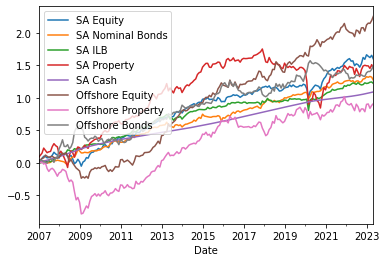

In [21]:
# plot the cumulative return of the log return
asset_return.cumsum().plot()

In [22]:
# calculate the mean return
asset_return.mean()

SA Equity            0.008108
SA Nominal Bonds     0.006457
SA ILB               0.006206
SA Property          0.007397
SA Cash              0.005547
Offshore Equity      0.011453
Offshore Property    0.004659
Offshore Bonds       0.007597
dtype: float64

In [44]:
# calculate the risk or variance of the portfolio return
asset_return.std()

SA Equity            0.031942
SA Nominal Bonds     0.022138
SA ILB               0.023775
SA Property          0.057079
SA Cash              0.001533
Offshore Equity      0.042608
Offshore Property    0.049242
Offshore Bonds       0.043492
dtype: float64

In [54]:
# generate random weights for assets in portfolio
random_weights = np.array(np.random.random(portfolio_size))

# generate the rebalance weights
rebalance_weights = random_weights / np.sum(random_weights)

# calculate the expected returns, 
portfolio_exp_ret = asset_return.mean().dot(rebalance_weights)
portfolio_exp_ret

0.0068946119480572

In [46]:
# calculate variance of the portfolio
portfolio_risk = rebalance_weights.T.dot(asset_return.cov().dot(rebalance_weights))**(1/2)
portfolio_risk

0.016767865152166696

In [53]:
# calculate sharpe ratio for asset
# risk free rate is the current CPI
risk_free_rate = 0.048
sharpe_ratio_assets = (asset_return.mean())/ asset_return.std()
sharpe_ratio_assets

SA Equity            0.253828
SA Nominal Bonds     0.291658
SA ILB               0.261042
SA Property          0.129596
SA Cash              3.617810
Offshore Equity      0.268811
Offshore Property    0.094619
Offshore Bonds       0.174678
dtype: float64

In [56]:
# calculate sharpe ratio of portfolio
sharpe_porfolio = portfolio_exp_ret / portfolio_risk
sharpe_porfolio

0.4111800688691904

## Portfolio weights optimisation

In [58]:
def sharpe_pf(W, returns):
    pf_risk = (W.dot(returns.cov()).dot(W))**0.5
    exp_return = W.dot(returns.mean())
    SR =  exp_return / pf_risk
    # we want to minimise this value hence return negative
    return -SR
    
    

In [60]:
sharpe_pf(rebalance_weights, asset_return)

-0.39898048350692594

In [61]:
# define constraints 
"""
1 - equality constraints
2 - inequality contraints
"""
const = ({"type":"eq", "fun": lambda x: np.sum(x) -1 })

In [65]:
opt_res = minimize(sharpe_pf, rebalance_weights, asset_return, bounds=Bounds(0,1), constraints = const)

In [67]:
np.sum(opt_res.x)

0.9999999999999999